# **CENG 489 Data Mining**


### Assignment 4 - SVM and MLP classifiers
### Due: January 16 by 11:59pm

This assignment is suggested to complete on Google colab  (https://colab.research.google.com/) to benefit from its GPU support. 

In [1]:
# importing common libraries
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#### **Part 1: Linear SVM Classifier**

 Binary classification on given dataset

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 

In [3]:
data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# store instances with second and third attibutes as x
x = df[df.target!=2].iloc[:,1:3].values

# store labels as y
y = df[df.target!=2].iloc[:,-1].values

# get a subset of data for binary clasification (with all instances from class 0 and class 1, not from class 2)
zero_target = df[df.target==0].iloc[:,1:3].to_numpy()
one_target = df[df.target==1].iloc[:,1:3].to_numpy()



#split your dataset in train (%70) and test-set (%30)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# we must convert 0 values to -1 for svm classifier

(91, 2)
(39, 2)
(91,)
(39,)


In [4]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


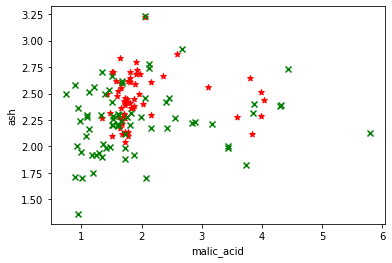

In [5]:

plt.xlabel('malic_acid')
plt.ylabel('ash')
plt.scatter(zero_target[:,0], zero_target[:,1], color='red', marker='*')
plt.scatter(one_target[:,0], one_target[:,1], color='green', marker='x')
# plt.scatter(zero_target[:,1], zero_target[:,2], color='red', marker='+')

In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

# classify with SVM Linear Classifier model
svm_classifier = svm.SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)


# Model Accuracy: how often is the classifier correct?
y_pred = svm_classifier.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
accuracy_score(y_test,y_pred)



[[ 9  5]
 [10 15]]


0.6153846153846154

In [7]:
# def plot_svm_decision_boundary(classifier,xmin,xmax,control):
    
#     #weights
#     w = classifier.coef_[0]
#     print(w)
#     #intercept
#     #b
#     b = classifier.intercept_[0]
    
#     #a
#     a = -w[0]/w[1]

#     x0 = np.linspace(xmin,xmax)
    
#     # y = a*x - b
#     decision_line =a*x0 - b/w[1]
    
#     plt.plot(x0, decision_line, 'k-')
    
#     if control == 0:
#         plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap='winter')
#     else:
#         plt.scatter(X_train_[:, 0], X_train_[:, 1], c = y_train, cmap='winter')
    
#     up_decision_line = decision_line + 1/w[1]
#     down_decision_line = decision_line - 1/w[1]

#     plt.plot(x0,up_decision_line,
#         x0,down_decision_line,color='grey', linestyle='--')

#     plt.show()

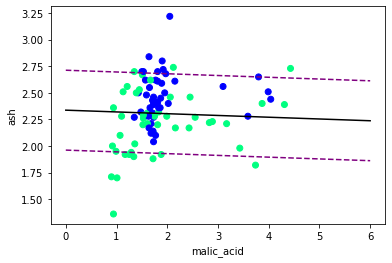

In [8]:
def plot_svm_decision_boundary(classifier,xmin,xmax, control):
    
    #weights
    w = classifier.coef_[0]
#     print(w)
    #intercept
    #b
    b = classifier.intercept_[0]
    
    #a
    a = -w[0]/w[1]
    
    x0 = np.linspace(xmin,xmax)
    
    # y = a*x - b
    decision_line =a*x0 - b/w[1]
    
    plt.plot(x0, decision_line, 'k-')
    if control == 0:
        plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap='winter')
    else:
        plt.scatter(X_train_[:, 0], X_train_[:, 1], c = y_train, cmap='winter')
    
    up_decision_line = decision_line + 1/w[1]
    down_decision_line = decision_line - 1/w[1]

    plt.plot(x0,up_decision_line,
        x0,down_decision_line,color='purple', linestyle='--'
                )
    plt.xlabel('malic_acid')
    plt.ylabel('ash')

    
    plt.show()
    
    

    
plot_svm_decision_boundary(svm_classifier, 0,6, 0 )



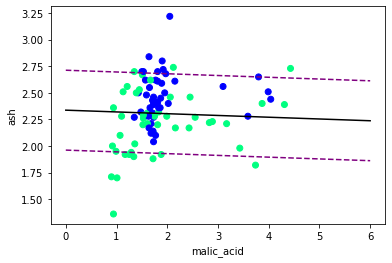

In [9]:
# call plot_svm_decision_boundary function for plotting decision boundary margings and suopprt vectors
plot_svm_decision_boundary(svm_classifier, 0,6 , 0)
#plot_svm_decision_boundary()
#plot also 2d data point for each class with different colored markers


Classify with Linear SVM on scaled and  also unscaled data, compare their decision boundaries using your plot_svm_decision_boundary function

UNSCALED


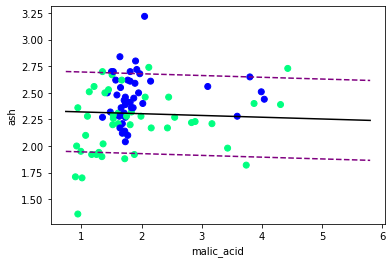

SCALED
accuracy of scaled data 0.5897435897435898


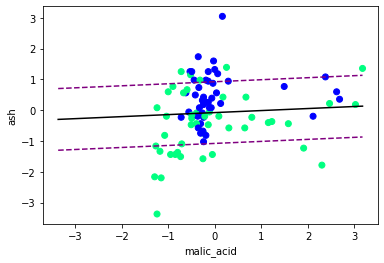

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# svm classfier on unscaled data
# plot data points and decision boundaries
# to-do
print("UNSCALED")
plot_svm_decision_boundary(svm_classifier, x.min().min(), x.max().max(), 0 )


# svm classfier on scaled data
# plot data points and decision boundaries
# to-do
print("SCALED")
X_train_ = scaler.fit(X_train).transform(X_train)
x_test = scaler.transform(X_test)

scaler_svm_classification = svm.SVC(kernel='linear')
scaler_svm_classification.fit(X_train_ , y_train)

scaled_pred = scaler_svm_classification.predict(x_test)
print('accuracy of scaled data', accuracy_score(y_test, scaled_pred))
plot_svm_decision_boundary(scaler_svm_classification, X_train_.min().min(), X_train_.max().max(), 1)


In [11]:
# get a test score using unscaled SVM classifier
print('Accuracy Score : ', accuracy_score(y_test,y_pred))


Accuracy Score :  0.6153846153846154


 #### **Part 2: NonLinear SVM**

Compare Linear and Kernel Multi-class SVMs

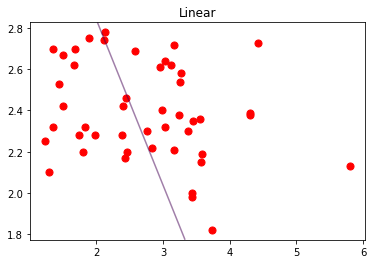

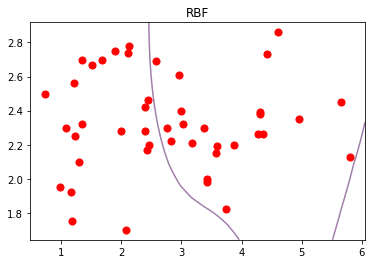

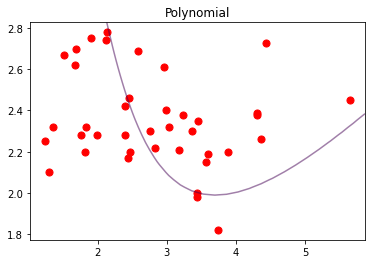

In [12]:
data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# store instances with second and third attibutes as x
x = df[df.target!=0].iloc[:,1:3].values

# store labels as y
y = df[df.target!=0].iloc[:,-1].values

# get a subset of data for binary clasification (with all instances from class 0 and class 1, not from class 2)
zero_target = df[df.target==0].iloc[:,1:3].to_numpy()
one_target = df[df.target==1].iloc[:,1:3].to_numpy()



#split your dataset in train (%70) and test-set (%30)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

C = 1.0  
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=1, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
sigmoid_fun = svm.SVC(kernel='sigmoid', C=C).fit(X_train, y_train)


def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
# Plot also the training points
# plot data and decision boundary
# add the titles for each plots
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], c='r', s=50)
plot_decision_boundary(svc)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.title('Linear')
plt.show()
plt.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], c='r', s=50)
plot_decision_boundary(rbf_svc)
plt.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.title('RBF')

plt.show()
plt.scatter(poly_svc.support_vectors_[:, 0], poly_svc.support_vectors_[:, 1], c='r', s=50)
plot_decision_boundary(poly_svc)
plt.scatter(poly_svc.support_vectors_[:, 0], poly_svc.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.title('Polynomial')


plt.show()

In [13]:
print(accuracy_score(y_test, svc.predict(X_test))) 
print(accuracy_score(y_test, rbf_svc.predict(X_test)))
print(accuracy_score(y_test, poly_svc.predict(X_test)))


0.7777777777777778
0.7777777777777778
0.8055555555555556


In [14]:

from sklearn.metrics import confusion_matrix
print("Linear FUNC")
print(confusion_matrix(y_test, svc.predict(X_test)))
print("RBF FUNC")
print(confusion_matrix(y_test, rbf_svc.predict(X_test)))
print("POLINOMIAL FUNC")
print(confusion_matrix(y_test, poly_svc.predict(X_test)))

Linear FUNC
[[17  5]
 [ 3 11]]
RBF FUNC
[[18  4]
 [ 4 10]]
POLINOMIAL FUNC
[[17  5]
 [ 2 12]]


#### **Part 3: MLP**

Constructing and training a 3 layered neural network using Pytorch library for digit classification (MNIST)

In [15]:
# required libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils
import time

In [16]:
# set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

/home/yazilimci/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


device(type='cpu')

In [17]:
# download MNIST train and test sets using pytorch datasets module 
datasets.MNIST.download

# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
transform = transforms.ToTensor()

# Load and transform data
train_data = torchvision.datasets.MNIST('', train=True, download=True, transform=transform)
# train_data = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=2)

test_data = torchvision.datasets.MNIST('', train=False, download=True, transform=transform)
# test_data = torch.utils.data.DataLoader(testset, shuffle=False, num_workers=2)

In [18]:
# lets look train_data structure
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
# define a display function for sample images using matplotlib
def display_sampledata(trainloader):
    # convert to numpy array ((C)hannelx(H)eightx(W)idth -> HxWxC )
    # plot image using matplotlib
    # TO-DO
    examples = enumerate(trainloader)
    batch_indx, (example_data, example_targets) = next(examples)
    
    fig = plt.figure()
    for i in range(16):
      plt.subplot(5,4,i+1)
      plt.tight_layout()
      plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
      plt.title("Ground Truth: {}".format(example_targets[i]))
      plt.xticks([])
      plt.yticks([])
    fig
        
#     print('Labels: ', example_targets[:12])
#     print('Batch shape: ', images.size())
    




In [20]:
# define a function for displaying the number of parameters
def get_netparams(net):
  # to-do
    return
#   return net.shape



In [21]:
# define a function that returns minibatch error in range [0,1]
def get_error(predicted_y, y):
  err =0.0
  for i in range(len(predicted_y)):
    if predicted_y[i] == y[i]:
      err = err + 1
  err = 1 - (err/len(predicted_y))
  return err

In [22]:
# define train and test data loaders
batch_size = 100
train_loader = torch.utils.data.DataLoader(train_data,batch_size=784,num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=784,shuffle=False, num_workers=2)

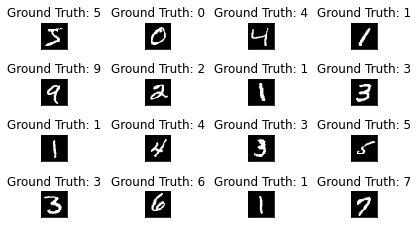

In [23]:
# get some random 16 images
# to-do
# show using your display_sampledata function
# to-do

display_sampledata(train_loader)


In [24]:
# Design a 3 layered  MLP network
class basicMLP(nn.Module):
  def __init__(self, input_size, num_hidden_neurons, num_classes):
        super(basicMLP, self).__init__()
        # define layers
        self.lyr1 = nn.Linear(input_size, num_hidden_neurons[0])
        self.lyr2 = nn.Linear(num_hidden_neurons[0], num_hidden_neurons[1])
        self.lyr3 = nn.Linear(num_hidden_neurons[1], num_classes)
        self.relu = nn.ReLU()
       
  def forward(self, input):
    # define forward pass of your NN
      input = F.relu(self.lyr1(input))
      input = F.relu(self.lyr2(input))
      input = self.lyr3(input)
      return input 
    

In [25]:
# create a 3 layered Neural Network instance for given parameters
# input size = image size * image size (get from your data shape)
# number of hidden neurons: 200 and 300
# number of classes: get from your data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
image_size = (example_data[0][0].shape)[0]
num_of_target = len(example_targets.unique())
net = basicMLP(image_size*image_size,[200,300], num_of_target)
net.to(device)
print(net)

get_netparams(net)

basicMLP(
  (lyr1): Linear(in_features=784, out_features=200, bias=True)
  (lyr2): Linear(in_features=200, out_features=300, bias=True)
  (lyr3): Linear(in_features=300, out_features=10, bias=True)
  (relu): ReLU()
)


In [26]:
# define cross entropy as loss function
# to-do
loss_func = nn.CrossEntropyLoss()
# setup the SGD optimizer with learning rate=1.e-2  (also try Adam optimizer later)
# to-do
sgd_optimizer = optim.SGD(net.parameters(), lr=0.02)
adam_optimizer = optim.Adam(net.parameters(), lr=0.001)

In [28]:
import time  
# Train your model over 5 epochs (you can also try longer training)
epochs = 5
steps = 0
# define lists/variables for tracking of the loss, error and the number of batches
running_loss = 0 
print_every = 20
train_losses, train_errors = [], []  
train_losses_i, train_errors_i = [], []  
start = time.time()
for epoch in range(epochs):
    for i ,(images,labels) in enumerate(train_loader):
        steps += 1
        # get data and target as minibatch (also assign to device)
        images, labels = images.to(device), labels.to(device)
        # reset the gradient
        sgd_optimizer.zero_grad()
        # a forward pass on your network
        log_ = net.forward(images.view(-1,784))
        # compute the loss
        loss = loss_func(log_, labels)
        # a backward pass, back propagation
        loss.backward()
        # update the network parameters
        sgd_optimizer.step()
        # get the minibatch error using your get_error function
        _, predicted = torch.max(log_, 1) 
        error = get_error(predicted,labels) 
        # keep loss, error for each iteration
        train_losses_i.append(loss.item())
        train_errors_i.append(error)
        

        if (i+1) % 20 == 0:
          print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f ERR: %.4f '%(epoch+1, epochs, i+1, len(train_data)//batch_size, loss.item(), error))
        if (i+1) % 1000 ==0:
          # save your model
          torch.save(net, 'model.pth')
              
elapsed_time = time.time() - start
print("Elapsed time: ",elapsed_time)
 

Epoch [1/5], Step [20/600], Loss: 0.8323 ERR: 0.1671 
Epoch [1/5], Step [40/600], Loss: 0.8977 ERR: 0.1926 
Epoch [1/5], Step [60/600], Loss: 0.7571 ERR: 0.1837 
Epoch [2/5], Step [20/600], Loss: 0.6639 ERR: 0.1390 
Epoch [2/5], Step [40/600], Loss: 0.7627 ERR: 0.1684 
Epoch [2/5], Step [60/600], Loss: 0.6357 ERR: 0.1607 
Epoch [3/5], Step [20/600], Loss: 0.5623 ERR: 0.1237 
Epoch [3/5], Step [40/600], Loss: 0.6805 ERR: 0.1620 
Epoch [3/5], Step [60/600], Loss: 0.5597 ERR: 0.1492 
Epoch [4/5], Step [20/600], Loss: 0.4956 ERR: 0.1122 
Epoch [4/5], Step [40/600], Loss: 0.6262 ERR: 0.1467 
Epoch [4/5], Step [60/600], Loss: 0.5079 ERR: 0.1416 
Epoch [5/5], Step [20/600], Loss: 0.4488 ERR: 0.1046 
Epoch [5/5], Step [40/600], Loss: 0.5877 ERR: 0.1403 
Epoch [5/5], Step [60/600], Loss: 0.4702 ERR: 0.1390 
Elapsed time:  35.15351128578186
